In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization

In [3]:
#importing dataset
train = pd.read_csv("/content/drive/Shareddrives/my_workspace/Task 3/w4_train_data.csv")
train.head()
print(train.shape)

(60000, 785)


In [4]:
#importing dataset
test = pd.read_csv("/content/drive/Shareddrives/my_workspace/Task 3/w4_test_data.csv")
test.head()
print(test.shape)

(10000, 785)


In [5]:
data = [train,test]
df = pd.concat(data)
df.shape

(70000, 785)

In [6]:
#label
y = df['y']

In [76]:
#spliting the dataset randmoly
X_train, X_test, y_train, y_test = train_test_split(df, y , test_size=10000, random_state=40)

In [77]:
X_train = X_train.drop('y',axis=1)
X_test = X_test.drop('y',axis=1)

In [78]:
#shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [79]:
#number of classes in this dataset
num_class = len(np.unique(y))
num_class

10

In [80]:
#one hot encoding fot the label For example, using a one-hot encoding for 10 classes, the integer 5 will be encoded as 0000010000.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [81]:
#converting to numpy array
X_train=np.array(X_train)
X_test=np.array(X_test)

In [82]:
#normalization the array data
X_train=X_train/255.0
X_test=X_test/255.0

In [83]:
#dimension of a single input
dimension = np.prod(X_train.shape[1:])
dimension


784

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and draws the confusion matrix.
    Normalization can be applied by setting normalize = True.
    """
    if not isinstance(y_pred[0], (np.int64, np.uint8)):
        _y_pred = np.eye(y_pred.shape[1])[y_pred.argmax(1)]
        _y_pred = [np.argmax(x) for x in _y_pred]
        _y_pred = np.rint(_y_pred)
        _y_pred = np.array([int(x) for x in _y_pred])
    else:
        _y_pred = y_pred.copy()
    if not isinstance(y_pred[0], (np.int64, np.uint8)):
        _y_true = [np.argmax(x) for x in y_true]
        _y_true = np.rint(_y_true)
        _y_true = np.array([int(x) for x in _y_true])
    else:
        _y_true = y_true.copy()
    
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix, without normalization.'

    cm = confusion_matrix(_y_true, _y_pred)
    classes = classes[unique_labels(_y_true, _y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without normalization.')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True Label',
           xlabel='Predicted Label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Simple model

In [85]:
#model creation
model = Sequential()
model.add(Dense(50, input_shape = (dimension, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = tf.keras.optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [90]:
#model training
history = model.fit(X_train, y_train, batch_size=256, epochs=100, verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 2.3011 - accuracy: 0.1130 - val_loss: 2.3010 - val_accuracy: 0.1097
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 2.3011 - accuracy: 0.1130 - val_loss: 2.3010 - val_accuracy: 0.1097
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 2.3010 - accuracy: 0.1130 - val_loss: 2.3010 - val_accuracy: 0.1097
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 2.3010 - accuracy: 0.1130 - val_loss: 2.3009 - val_accuracy: 0.1097
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1130 - val_loss: 2.3009 - val_accuracy: 0.1097
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1130 - val_loss: 2.3009 - val_accuracy: 0.1097
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1130 - val_loss: 2.3009 - val_accuracy: 0.1097

In [91]:
#model performance evaluation
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 2.3003 - accuracy: 0.1097
Evaluation result on Test Data : Loss = 2.3003275394439697, accuracy = 0.10970000177621841


Text(0.5, 1.0, 'Accuracy Curves')

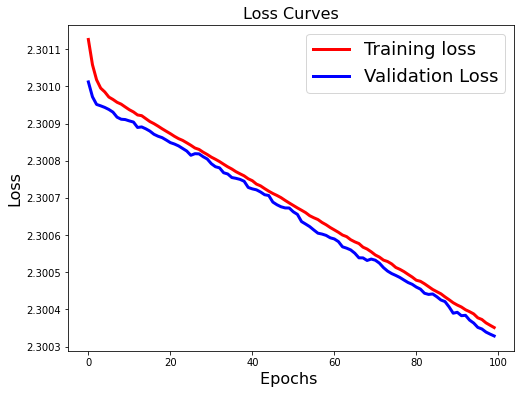

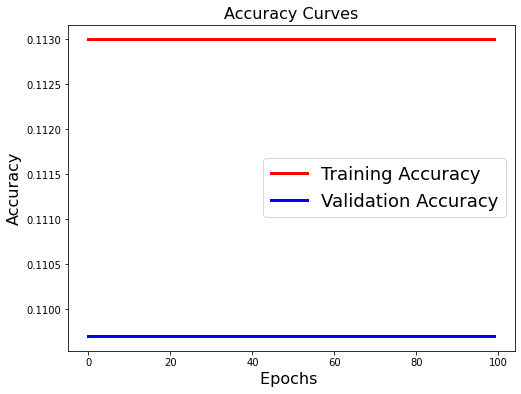

In [92]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Normalized Confusion Matrix
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


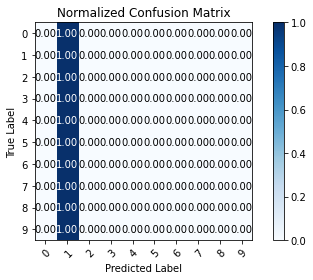

In [93]:
plot_confusion_matrix(y_true=y_test, y_pred=model.predict(X_test), classes=np.array(range(10)), normalize=True)

# Advance Technique
## 1. Weight Initialization

In [22]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (dimension, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = tf.keras.optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [23]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
1313/1313 [==============================] - 9s 7ms/step - loss: 2.3481 - accuracy: 0.1137 - val_loss: 2.3071 - val_accuracy: 0.1113
Epoch 2/100
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3026 - accuracy: 0.1137 - val_loss: 2.3017 - val_accuracy: 0.1113
Epoch 3/100
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3012 - accuracy: 0.1137 - val_loss: 2.3012 - val_accuracy: 0.1113
Epoch 4/100
1313/1313 [==============================] - 6s 5ms/step - loss: 2.3010 - accuracy: 0.1137 - val_loss: 2.3010 - val_accuracy: 0.1113
Epoch 5/100
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3008 - accuracy: 0.1137 - val_loss: 2.3008 - val_accuracy: 0.1113
Epoch 6/100
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3006 - accuracy: 0.1137 - val_loss: 2.3006 - val_accuracy: 0.1113
Epoch 7/100
1313/1313 [==============================] - 6s 5ms/step - loss: 2.3004 - accuracy: 0.1137 - val_loss: 2.3005 - val_ac

Text(0.5, 1.0, 'Accuracy Curves')

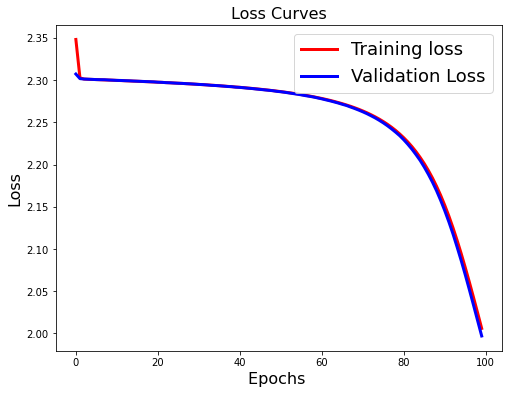

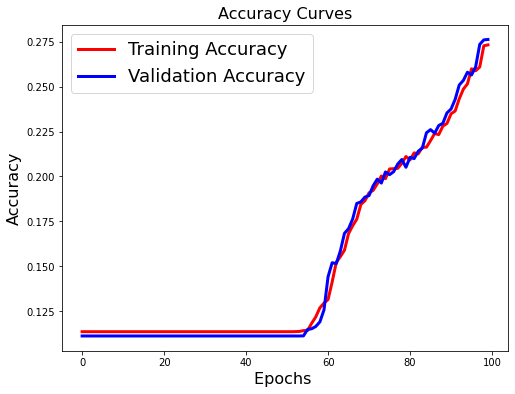

In [24]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [25]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.9968 - accuracy: 0.2764
Test accuracy:  0.27639999985694885


Normalized Confusion Matrix
[[9.78915663e-01 4.01606426e-03 7.02811245e-03 6.02409639e-03
  0.00000000e+00 0.00000000e+00 4.01606426e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.95442115e-01 3.64630811e-03 9.11577028e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.39143135e-01 2.27848101e-01 1.85004869e-01 1.36319377e-01
  9.73709834e-04 0.00000000e+00 1.07108082e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.50000000e-01 3.17924528e-01 1.17924528e-01 3.08490566e-01
  0.00000000e+00 0.00000000e+00 5.66037736e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.62512665e-02 6.64640324e-01 4.05268490e-03 8.61195542e-02
  8.00405268e-02 0.00000000e+00 6.88956434e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.55696203e-01 2.56616801e-01 1.00115075e-01 1.35788262e-01
  3.45224396e-03 0.00000000e+00 4.83314154e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.24210526e-01 7.36842105e-0

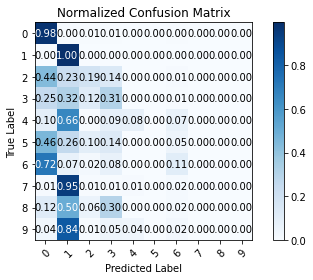

In [26]:
plot_confusion_matrix(y_true=y_test, y_pred=model.predict(X_test), classes=np.array(range(10)), normalize=True)

## 2. Nonlinearity (Activation function)

In [27]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (dimension, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = tf.keras.optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [28]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
1313/1313 [==============================] - 8s 6ms/step - loss: 2.2542 - accuracy: 0.1694 - val_loss: 2.1909 - val_accuracy: 0.2412
Epoch 2/100
1313/1313 [==============================] - 6s 5ms/step - loss: 2.0602 - accuracy: 0.3014 - val_loss: 1.8768 - val_accuracy: 0.3586
Epoch 3/100
1313/1313 [==============================] - 6s 5ms/step - loss: 1.6161 - accuracy: 0.4759 - val_loss: 1.3371 - val_accuracy: 0.6314
Epoch 4/100
1313/1313 [==============================] - 6s 5ms/step - loss: 1.1054 - accuracy: 0.7101 - val_loss: 0.9096 - val_accuracy: 0.7561
Epoch 5/100
1313/1313 [==============================] - 7s 6ms/step - loss: 0.7922 - accuracy: 0.7826 - val_loss: 0.6946 - val_accuracy: 0.8062
Epoch 6/100
1313/1313 [==============================] - 7s 6ms/step - loss: 0.6348 - accuracy: 0.8217 - val_loss: 0.5841 - val_accuracy: 0.8341
Epoch 7/100
1313/1313 [==============================] - 6s 5ms/step - loss: 0.5445 - accuracy: 0.8468 - val_loss: 0.5158 - val_ac

Text(0.5, 1.0, 'Accuracy Curves')

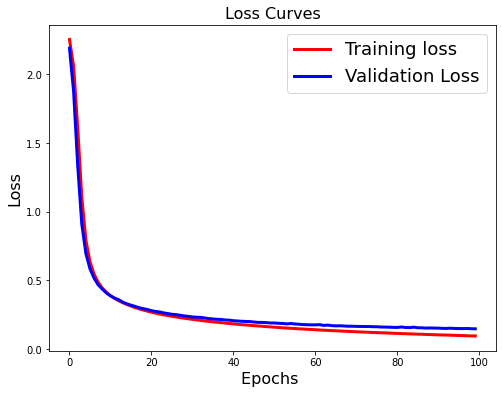

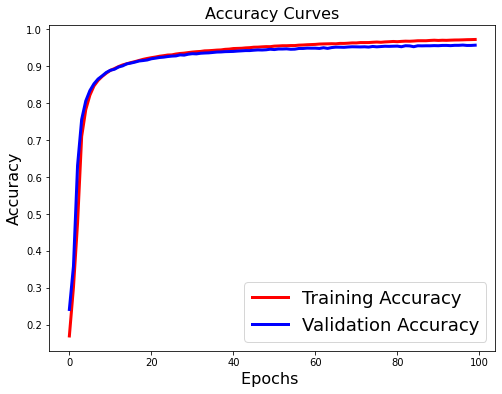

In [29]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [30]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1526 - accuracy: 0.9566
Test accuracy:  0.95660001039505


Normalized Confusion Matrix
[[9.68875502e-01 1.00401606e-03 7.02811245e-03 2.00803213e-03
  0.00000000e+00 3.01204819e-03 8.03212851e-03 5.02008032e-03
  5.02008032e-03 0.00000000e+00]
 [0.00000000e+00 9.84503191e-01 9.11577028e-04 3.64630811e-03
  1.82315406e-03 0.00000000e+00 9.11577028e-04 9.11577028e-04
  5.46946217e-03 1.82315406e-03]
 [9.73709834e-04 2.92112950e-03 9.69814995e-01 5.84225901e-03
  2.92112950e-03 9.73709834e-04 9.73709834e-04 5.84225901e-03
  7.78967868e-03 1.94741967e-03]
 [1.88679245e-03 5.66037736e-03 1.60377358e-02 9.39622642e-01
  0.00000000e+00 1.79245283e-02 9.43396226e-04 9.43396226e-03
  7.54716981e-03 9.43396226e-04]
 [1.01317123e-03 1.01317123e-03 5.06585613e-03 0.00000000e+00
  9.62512665e-01 0.00000000e+00 9.11854103e-03 2.02634245e-03
  3.03951368e-03 1.62107396e-02]
 [5.75373993e-03 2.30149597e-03 5.75373993e-03 1.15074799e-02
  5.75373993e-03 9.42462601e-01 9.20598389e-03 3.45224396e-03
  4.60299194e-03 9.20598389e-03]
 [2.10526316e-03 3.15789474e-0

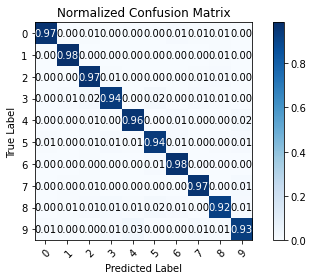

In [31]:
plot_confusion_matrix(y_true=y_test, y_pred=model.predict(X_test), classes=np.array(range(10)), normalize=True)

## 3. Optimizer

In [32]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (dimension, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [33]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1313/1313 [==============================] - 8s 5ms/step - loss: 1.1539 - accuracy: 0.6146 - val_loss: 0.5421 - val_accuracy: 0.8657
Epoch 2/100
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3721 - accuracy: 0.9070 - val_loss: 0.2828 - val_accuracy: 0.9274
Epoch 3/100
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2362 - accuracy: 0.9382 - val_loss: 0.2331 - val_accuracy: 0.9360
Epoch 4/100
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1807 - accuracy: 0.9509 - val_loss: 0.2023 - val_accuracy: 0.9440
Epoch 5/100
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1470 - accuracy: 0.9606 - val_loss: 0.1733 - val_accuracy: 0.9520
Epoch 6/100
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1242 - accuracy: 0.9658 - val_loss: 0.1575 - val_accuracy: 0.9564
Epoch 7/100
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1042 - accuracy: 0.9708 - val_loss: 0.1633 - val_ac

Text(0.5, 1.0, 'Accuracy Curves')

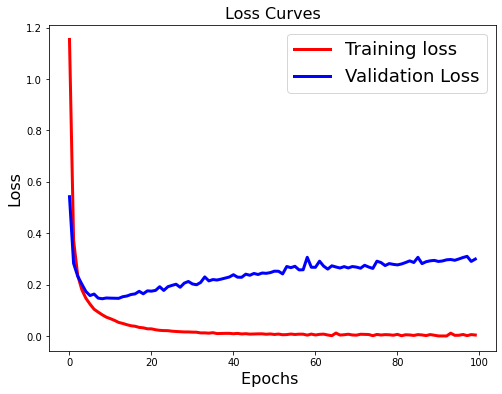

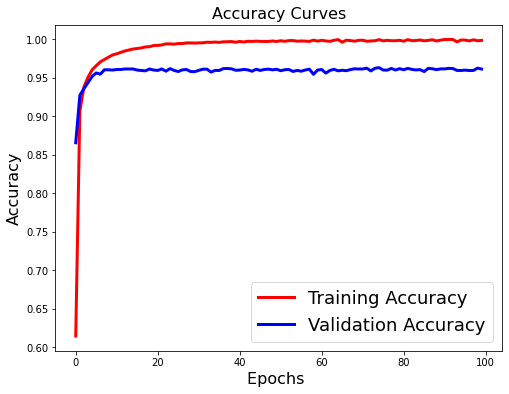

In [34]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [35]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2878 - accuracy: 0.9589
Test accuracy:  0.958899974822998


Normalized Confusion Matrix
[[9.72891566e-01 0.00000000e+00 9.03614458e-03 0.00000000e+00
  3.01204819e-03 1.00401606e-03 1.10441767e-02 1.00401606e-03
  2.00803213e-03 0.00000000e+00]
 [0.00000000e+00 9.89061076e-01 5.46946217e-03 9.11577028e-04
  9.11577028e-04 0.00000000e+00 0.00000000e+00 1.82315406e-03
  1.82315406e-03 0.00000000e+00]
 [3.89483934e-03 3.89483934e-03 9.71762415e-01 3.89483934e-03
  3.89483934e-03 1.94741967e-03 1.94741967e-03 5.84225901e-03
  1.94741967e-03 9.73709834e-04]
 [0.00000000e+00 1.88679245e-03 1.50943396e-02 9.42452830e-01
  9.43396226e-04 1.88679245e-02 0.00000000e+00 1.32075472e-02
  5.66037736e-03 1.88679245e-03]
 [0.00000000e+00 5.06585613e-03 1.01317123e-03 0.00000000e+00
  9.66565350e-01 2.02634245e-03 1.21580547e-02 4.05268490e-03
  4.05268490e-03 5.06585613e-03]
 [3.45224396e-03 1.15074799e-03 3.45224396e-03 1.26582278e-02
  4.60299194e-03 9.43613349e-01 1.38089758e-02 1.15074799e-03
  8.05523590e-03 8.05523590e-03]
 [3.15789474e-03 2.10526316e-0

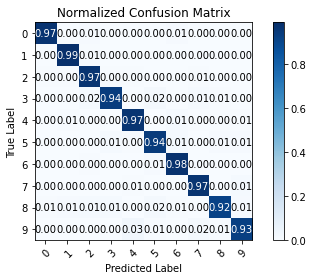

In [36]:
plot_confusion_matrix(y_true=y_test, y_pred=model.predict(X_test), classes=np.array(range(10)), normalize=True)

## 4. Batch Normalization

In [37]:
from keras.layers import BatchNormalization
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (dimension, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = tf.keras.optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [38]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1313/1313 [==============================] - 14s 9ms/step - loss: 2.0921 - accuracy: 0.3263 - val_loss: 1.8129 - val_accuracy: 0.5762
Epoch 2/100
1313/1313 [==============================] - 12s 9ms/step - loss: 1.6905 - accuracy: 0.6364 - val_loss: 1.5502 - val_accuracy: 0.7157
Epoch 3/100
1313/1313 [==============================] - 12s 9ms/step - loss: 1.4911 - accuracy: 0.7286 - val_loss: 1.3822 - val_accuracy: 0.7792
Epoch 4/100
1313/1313 [==============================] - 12s 9ms/step - loss: 1.3509 - accuracy: 0.7760 - val_loss: 1.2576 - val_accuracy: 0.8129
Epoch 5/100
1313/1313 [==============================] - 13s 10ms/step - loss: 1.2410 - accuracy: 0.8018 - val_loss: 1.1578 - val_accuracy: 0.8332
Epoch 6/100
1313/1313 [==============================] - 12s 9ms/step - loss: 1.1488 - accuracy: 0.8191 - val_loss: 1.0709 - val_accuracy: 0.8458
Epoch 7/100
1313/1313 [==============================] - 12s 9ms/step - loss: 1.0705 - accuracy: 0.8325 - val_loss: 0.9969 - val_accura

Text(0.5, 1.0, 'Accuracy Curves')

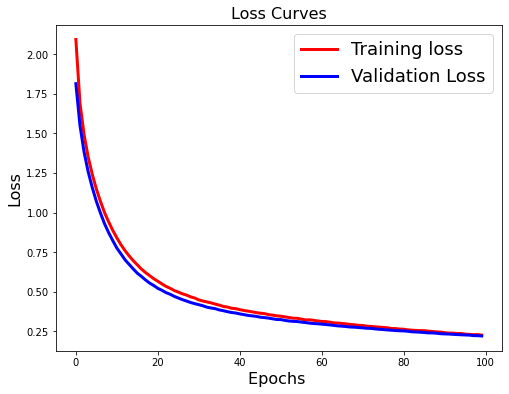

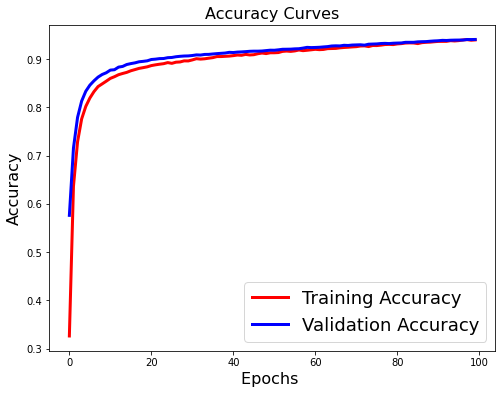

In [39]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [40]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.2186 - accuracy: 0.9411
Test accuracy:  0.941100001335144


Normalized Confusion Matrix
[[9.69879518e-01 0.00000000e+00 3.01204819e-03 4.01606426e-03
  3.01204819e-03 1.00401606e-03 1.00401606e-02 0.00000000e+00
  7.02811245e-03 2.00803213e-03]
 [0.00000000e+00 9.86326345e-01 1.82315406e-03 2.73473108e-03
  9.11577028e-04 1.82315406e-03 0.00000000e+00 1.82315406e-03
  3.64630811e-03 9.11577028e-04]
 [4.86854917e-03 3.89483934e-03 9.35735151e-01 7.78967868e-03
  1.26582278e-02 3.89483934e-03 1.26582278e-02 3.89483934e-03
  1.16845180e-02 2.92112950e-03]
 [2.83018868e-03 9.43396226e-03 1.88679245e-02 9.02830189e-01
  1.88679245e-03 3.01886792e-02 1.88679245e-03 9.43396226e-03
  1.41509434e-02 8.49056604e-03]
 [0.00000000e+00 2.02634245e-03 7.09219858e-03 0.00000000e+00
  9.62512665e-01 2.02634245e-03 4.05268490e-03 2.02634245e-03
  5.06585613e-03 1.51975684e-02]
 [4.60299194e-03 5.75373993e-03 4.60299194e-03 2.64672037e-02
  1.03567319e-02 9.04487917e-01 1.38089758e-02 4.60299194e-03
  1.38089758e-02 1.15074799e-02]
 [4.21052632e-03 5.26315789e-0

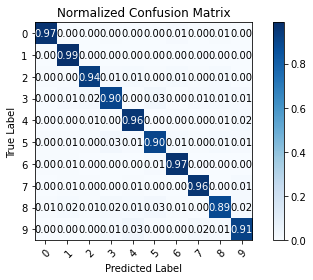

In [41]:
plot_confusion_matrix(y_true=y_test, y_pred=model.predict(X_test), classes=np.array(range(10)), normalize=True)

## 5. Dropout (Regularization)

In [42]:
from keras.layers import Dropout
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (dimension, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd =  tf.keras.optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [43]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
1313/1313 [==============================] - 8s 6ms/step - loss: 2.4236 - accuracy: 0.1014 - val_loss: 2.3065 - val_accuracy: 0.1164
Epoch 2/100
1313/1313 [==============================] - 7s 5ms/step - loss: 2.3506 - accuracy: 0.0995 - val_loss: 2.3013 - val_accuracy: 0.1113
Epoch 3/100
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3458 - accuracy: 0.1016 - val_loss: 2.3013 - val_accuracy: 0.1113
Epoch 4/100
1313/1313 [==============================] - 7s 5ms/step - loss: 2.3443 - accuracy: 0.1037 - val_loss: 2.3013 - val_accuracy: 0.1113
Epoch 5/100
1313/1313 [==============================] - 7s 5ms/step - loss: 2.3426 - accuracy: 0.1030 - val_loss: 2.3013 - val_accuracy: 0.1113
Epoch 6/100
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3427 - accuracy: 0.0997 - val_loss: 2.3012 - val_accuracy: 0.1113
Epoch 7/100
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3409 - accuracy: 0.0994 - val_loss: 2.3012 - val_ac

Text(0.5, 1.0, 'Accuracy Curves')

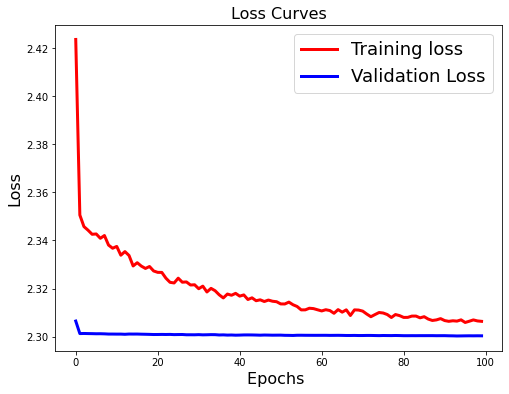

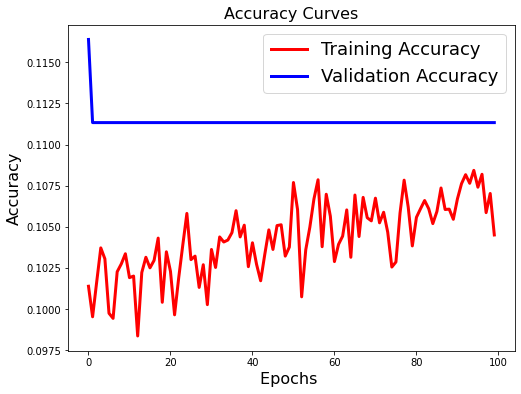

In [44]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [45]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 1s 3ms/step - loss: 2.3002 - accuracy: 0.1097
Test accuracy:  0.10970000177621841


Normalized Confusion Matrix
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


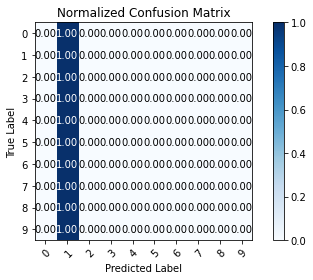

In [46]:
plot_confusion_matrix(y_true=y_test, y_pred=model.predict(X_test), classes=np.array(range(10)), normalize=True)

## 6. Model Ensemble

In [47]:
!pip install scikeras

from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.2
    Uninstalling importlib-metadata-4.11.2:
      Successfully uninstalled importlib-metadata-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [48]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [50]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd =  tf.keras.optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [51]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model1._estimator_type = "classifier"
model2._estimator_type = "classifier"
model3._estimator_type = "classifier"

In [52]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')
ensemble_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3541 - accuracy: 0.1021
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3018 - accuracy: 0.1130
Epoch 3/100
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3014 - accuracy: 0.1130
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3013 - accuracy: 0.1130
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3013 - accuracy: 0.1130
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3012 - accuracy: 0.1130
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3012 - accuracy: 0.1130
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3012 - accuracy: 0.1130
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3011 - accuracy: 0.1130
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step 

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3376 - accuracy: 0.1045
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3014 - accuracy: 0.1130
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3012 - accuracy: 0.1130
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3012 - accuracy: 0.1130
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3011 - accuracy: 0.1130
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3011 - accuracy: 0.1130
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3010 - accuracy: 0.1130
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3010 - accuracy: 0.1130
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3009 - accuracy: 0.1130
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - l

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3228 - accuracy: 0.1110
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3014 - accuracy: 0.1130
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3012 - accuracy: 0.1130
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3012 - accuracy: 0.1130
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3011 - accuracy: 0.1130
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3011 - accuracy: 0.1130
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3010 - accuracy: 0.1130
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3010 - accuracy: 0.1130
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3009 - accuracy: 0.1130
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - l

VotingClassifier(estimators=[('model1',
                              KerasClassifier(build_fn=<function mlp_model at 0x7f601750f9e0>, epochs=100)),
                             ('model2',
                              KerasClassifier(build_fn=<function mlp_model at 0x7f601750f9e0>, epochs=100)),
                             ('model3',
                              KerasClassifier(build_fn=<function mlp_model at 0x7f601750f9e0>, epochs=100))],
                 voting='soft')

In [53]:
y_pred = ensemble_clf.predict(X_test)
print('Test accuracy:', accuracy_score(y_pred, y_test))

313/313 [==============================] - 1s 2ms/step
Test accuracy: 0.1097


313/313 [==============================] - 1s 2ms/step
Normalized Confusion Matrix
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


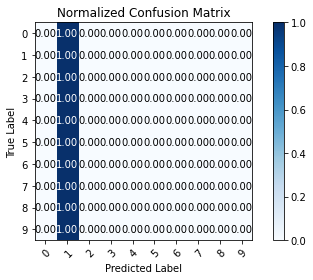

In [54]:
plot_confusion_matrix(y_true=y_test, y_pred=ensemble_clf.predict(X_test), classes=np.array(range(10)), normalize=True)







































































































































































































## Putting All together

































































































































































































































































































































































In [55]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.wrappers.scikit_learn import KerasClassifier
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout
from keras import optimizers

from scikeras.wrappers import KerasClassifier

In [56]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (dimension, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam =  tf.keras.optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [57]:
# create 5 models to ensemble
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 100)

In [58]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')
ensemble_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1875/1875 [==============================] - 23s 11ms/step - loss: 0.7630 - accuracy: 0.7692
Epoch 2/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4429 - accuracy: 0.8735
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3750 - accuracy: 0.8920
Epoch 4/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3346 - accuracy: 0.9053
Epoch 5/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3087 - accuracy: 0.9115
Epoch 6/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2902 - accuracy: 0.9175
Epoch 7/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2687 - accuracy: 0.9232
Epoch 8/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2612 - accuracy: 0.9259
Epoch 9/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2532 - accuracy: 0.9264
Epoch 10/100
1875/1875 [==============================] - 12s 

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7705 - accuracy: 0.7629
Epoch 2/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4351 - accuracy: 0.8737
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3697 - accuracy: 0.8947
Epoch 4/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3286 - accuracy: 0.9068
Epoch 5/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2986 - accuracy: 0.9148
Epoch 6/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2861 - accuracy: 0.9180
Epoch 7/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2693 - accuracy: 0.9233
Epoch 8/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2577 - accuracy: 0.9268
Epoch 9/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2466 - accuracy: 0.9305
Epoch 10/100
1875/1875 [==============================] - 10s 5m

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7552 - accuracy: 0.7690
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4293 - accuracy: 0.8776
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3578 - accuracy: 0.8985
Epoch 4/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3181 - accuracy: 0.9107
Epoch 5/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2927 - accuracy: 0.9163
Epoch 6/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2736 - accuracy: 0.9231
Epoch 7/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2546 - accuracy: 0.9282
Epoch 8/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2520 - accuracy: 0.9277
Epoch 9/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2424 - accuracy: 0.9316
Epoch 10/100
1875/1875 [==============================] - 11s 6ms

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7533 - accuracy: 0.7724
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4362 - accuracy: 0.8765
Epoch 3/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3559 - accuracy: 0.8982
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3258 - accuracy: 0.9076
Epoch 5/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2969 - accuracy: 0.9139
Epoch 6/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2759 - accuracy: 0.9221
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2656 - accuracy: 0.9244
Epoch 8/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2538 - accuracy: 0.9280
Epoch 9/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2439 - accuracy: 0.9315
Epoch 10/100
1875/1875 [==============================] - 11s 6m

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7487 - accuracy: 0.7728
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4187 - accuracy: 0.8799
Epoch 3/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3580 - accuracy: 0.8971
Epoch 4/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3232 - accuracy: 0.9075
Epoch 5/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2922 - accuracy: 0.9173
Epoch 6/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2757 - accuracy: 0.9222
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2615 - accuracy: 0.9259
Epoch 8/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2502 - accuracy: 0.9280
Epoch 9/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2483 - accuracy: 0.9296
Epoch 10/100
1875/1875 [==============================] - 11s 6m

VotingClassifier(estimators=[('model1',
                              KerasClassifier(build_fn=<function mlp_model at 0x7f60173d8b00>, epochs=100)),
                             ('model2',
                              KerasClassifier(build_fn=<function mlp_model at 0x7f60173d8b00>, epochs=100)),
                             ('model3',
                              KerasClassifier(build_fn=<function mlp_model at 0x7f60173d8b00>, epochs=100)),
                             ('model4',
                              KerasClassifier(build_fn=<function mlp_model at 0x7f60173d8b00>, epochs=100)),
                             ('model5',
                              KerasClassifier(build_fn=<function mlp_model at 0x7f60173d8b00>, epochs=100))],
                 voting='soft')

In [59]:

y_pred = ensemble_clf.predict(X_test)
print('Acc: ', accuracy_score(y_pred, y_test))

313/313 [==============================] - 1s 2ms/step
Acc:  0.978


313/313 [==============================] - 1s 2ms/step
Normalized Confusion Matrix
[[9.81927711e-01 0.00000000e+00 3.01204819e-03 1.00401606e-03
  1.00401606e-03 1.00401606e-03 5.02008032e-03 0.00000000e+00
  7.02811245e-03 0.00000000e+00]
 [0.00000000e+00 9.93618961e-01 2.73473108e-03 9.11577028e-04
  9.11577028e-04 0.00000000e+00 0.00000000e+00 9.11577028e-04
  9.11577028e-04 0.00000000e+00]
 [9.73709834e-04 0.00000000e+00 9.86368062e-01 2.92112950e-03
  9.73709834e-04 0.00000000e+00 9.73709834e-04 3.89483934e-03
  2.92112950e-03 9.73709834e-04]
 [9.43396226e-04 3.77358491e-03 7.54716981e-03 9.72641509e-01
  0.00000000e+00 4.71698113e-03 0.00000000e+00 5.66037736e-03
  3.77358491e-03 9.43396226e-04]
 [0.00000000e+00 1.01317123e-03 4.05268490e-03 0.00000000e+00
  9.83789260e-01 2.02634245e-03 3.03951368e-03 1.01317123e-03
  2.02634245e-03 3.03951368e-03]
 [2.30149597e-03 2.30149597e-03 1.15074799e-03 6.90448792e-03
  1.15074799e-03 9.65477560e-01 9.20598389e-03 2.30149597e-03
  2.3014

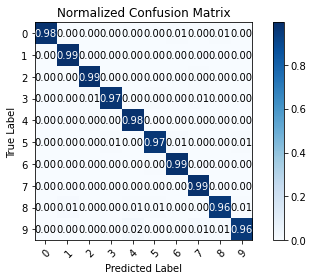

In [60]:
plot_confusion_matrix(y_true=y_test, y_pred=ensemble_clf.predict(X_test), classes=np.array(range(10)), normalize=True)

## After Regularizaton

In [94]:
from tensorflow.keras.layers import Dropout
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimension,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(10, activation='softmax'))

In [95]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history_reg = model_reg.fit(X_train, y_train, batch_size=256, epochs=100, verbose=1, 
                            validation_data=(X_test, y_test))


Epoch 1/100
235/235 [==============================] - 3s 8ms/step - loss: 0.3714 - accuracy: 0.8859 - val_loss: 0.1558 - val_accuracy: 0.9513
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1656 - accuracy: 0.9499 - val_loss: 0.1136 - val_accuracy: 0.9669
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1277 - accuracy: 0.9607 - val_loss: 0.0946 - val_accuracy: 0.9717
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1090 - accuracy: 0.9677 - val_loss: 0.0794 - val_accuracy: 0.9759
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0919 - accuracy: 0.9728 - val_loss: 0.0841 - val_accuracy: 0.9756
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0856 - accuracy: 0.9747 - val_loss: 0.0891 - val_accuracy: 0.9750
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0788 - accuracy: 0.9756 - val_loss: 0.0734 - val_accuracy: 0.9790

Text(0.5, 1.0, 'Accuracy Curves')

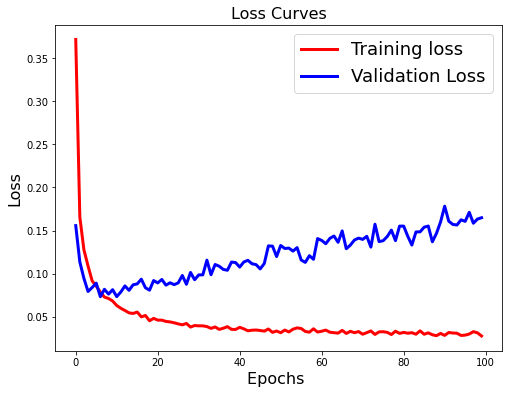

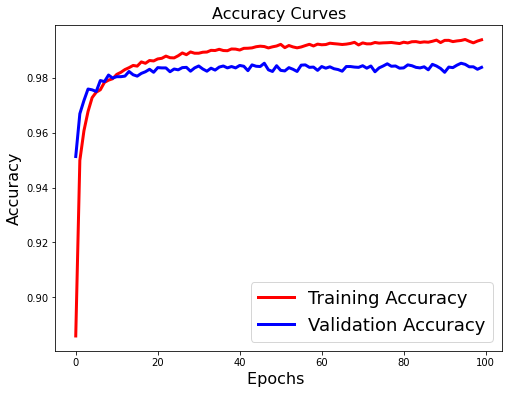

In [96]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [97]:
results = model_reg.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1649 - accuracy: 0.9838
Test accuracy:  0.9837999939918518
